In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Reading CSV file.
df = pd.read_csv('/content/archive.zip')
df

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5
...,...,...,...,...,...,...,...,...
116,117,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1
117,118,India,21.2,5.6,13.7,23.8,15.1,82.6
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0


In [ ]:
#Dropping the unwanted columns.
df.drop(columns = ['Country','Rent Index','Groceries Index'], inplace= True)

In [ ]:
df

,Rank,Cost of Living Index,Cost of Living Plus Rent Index,Restaurant Price Index,Local Purchasing Power Index
0,1,101.1,74.9,97.0,158.7
1,2,85.0,61.8,83.3,54.6
2,3,83.0,62.0,86.8,120.3
3,4,76.7,72.1,50.4,111.1
4,5,76.6,48.9,69.4,43.5
...,...,...,...,...,...
116,117,22.5,12.8,12.8,33.1
117,118,21.2,13.7,15.1,82.6
118,119,21.0,12.7,16.2,20.0
119,120,20.4,12.7,15.2,42.0


In [ ]:
#To Find the Null or missing values in each Column.
df.isnull().sum()

,0
Rank,0
Cost of Living Index,0
Cost of Living Plus Rent Index,0
Restaurant Price Index,0
Local Purchasing Power Index,0


In [ ]:
#To Find the Null or missing values in each Column in Percentage.
(df.isnull().sum()*100)/df.shape[0]

,0
Rank,0.0
Cost of Living Index,0.0
Cost of Living Plus Rent Index,0.0
Restaurant Price Index,0.0
Local Purchasing Power Index,0.0


In [ ]:
#This drops the rows with null values.
df.dropna(inplace=True)

In [ ]:
#This Shows the null value present in the each columns.
df.isnull().sum()

,0
Rank,0
Cost of Living Index,0
Cost of Living Plus Rent Index,0
Restaurant Price Index,0
Local Purchasing Power Index,0


In [ ]:
#Noarmalization...
b = (df['Restaurant Price Index'] - df['Restaurant Price Index'].min())/(df['Restaurant Price Index'].max()- df['Restaurant Price Index'].min())
b

,Restaurant Price Index
0,1.000000
1,0.837292
2,0.878860
3,0.446556
4,0.672209
...,...
116,0.000000
117,0.027316
118,0.040380
119,0.028504


In [ ]:
features = df.drop('Restaurant Price Index', axis = 1)
target = df['Restaurant Price Index']


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
# Training and Testing the sets.
X_train, X_test, y_train, y_test=train_test_split(features,target,test_size=0.2)


In [ ]:
from sklearn.tree import DecisionTreeRegressor # Use a regressor for continuous target variables

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)


DecisionTreeRegressor()

In [ ]:
model.score(X_test,y_test)

0.7969416650358511

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
#Predicting  on Training and Testing .
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [ ]:
# Training set performance
from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Print or use the calculated metrics as needed
print(f'Mean Squared Error: {train_mse}')
print(f'R-squared: {train_r2}')

Mean Squared Error: 0.0
R-squared: 1.0


In [ ]:
# Testing set performance
from sklearn.metrics import mean_squared_error, r2_score

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print or use the calculated metrics as needed
print(f'Mean Squared Error: {test_mse}')
print(f'R-squared: {test_r2}')


Mean Squared Error: 59.63360000000001
R-squared: 0.7969416650358511


In [ ]:
#Predicting the strokes

model.predict([[1,2,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([81.3])

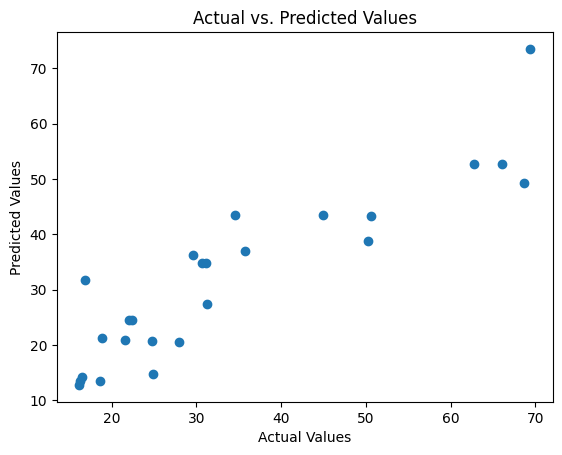

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have y_test (actual values) and y_test_pred (predicted values)
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

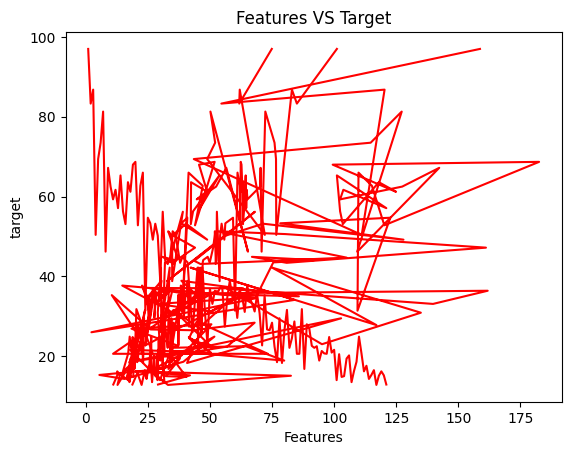

In [ ]:
plt.plot(features,target,'r')
plt.xlabel('Features')
plt.ylabel('target')
plt.title('Features VS Target')
plt.show()